# Import Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
customers_df = pd.read_csv('Mall_Customers.csv')

# Data Exploration

In [3]:
customers_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customers_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


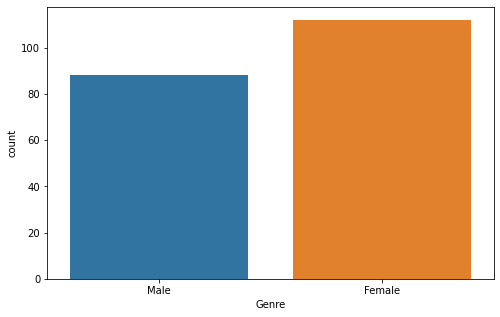

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(x='Genre',data=customers_df)
plt.show()

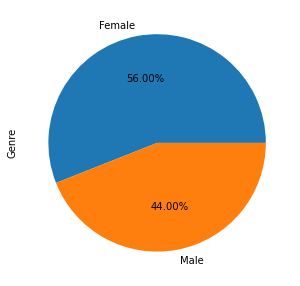

In [10]:
plt.figure(figsize=(8,5))
customers_df.Genre.value_counts().plot.pie( autopct='%.2f%%')
plt.show()

In [11]:
customers_df.Age.describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

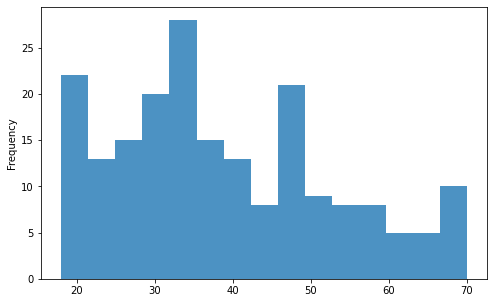

In [12]:
plt.figure(figsize=(8,5))
customers_df.Age.plot.hist(bins=15,alpha=.8)
plt.show()

<AxesSubplot:xlabel='Age'>

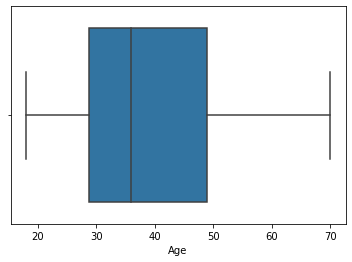

In [13]:
sns.boxplot(x='Age',data=customers_df)

In [14]:
customers_df['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

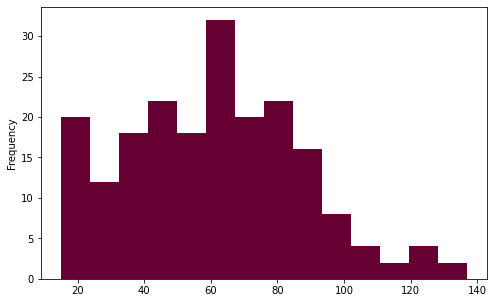

In [15]:
plt.figure(figsize=(8,5))
customers_df['Annual Income (k$)'].plot.hist(bins=14,color="#660033")
plt.show()

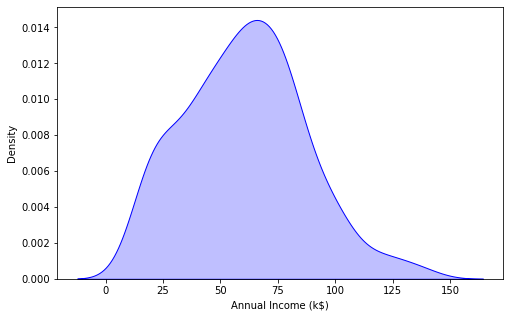

In [16]:
plt.figure(figsize=(8,5))
sns.kdeplot(customers_df['Annual Income (k$)'], color="blue", shade=True)
plt.show()

In [17]:
customers_df['Spending Score (1-100)'].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64

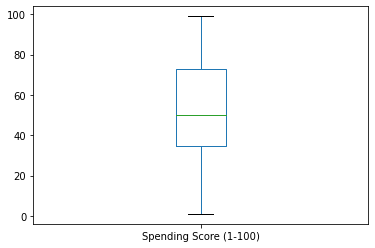

In [18]:
customers_df['Spending Score (1-100)'].plot.box()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


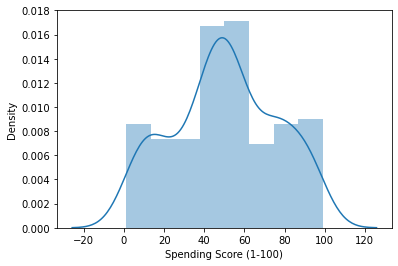

In [19]:
sns.distplot(customers_df['Spending Score (1-100)'])
plt.show()

In [21]:
customers_df['Genre'] = customers_df.Genre.map({'Male':1,'Female':0})

# K-means Clustering

For n_clusters = 2 The average silhouette_score is : 0.29307334005502633
For n_clusters = 3 The average silhouette_score is : 0.383798873822341
For n_clusters = 4 The average silhouette_score is : 0.4052954330641215
For n_clusters = 5 The average silhouette_score is : 0.4440669204743008
For n_clusters = 6 The average silhouette_score is : 0.45205475380756527
For n_clusters = 7 The average silhouette_score is : 0.43949619264530887
For n_clusters = 8 The average silhouette_score is : 0.4349105351263195
For n_clusters = 9 The average silhouette_score is : 0.4080555594955236
For n_clusters = 10 The average silhouette_score is : 0.3828606213726962


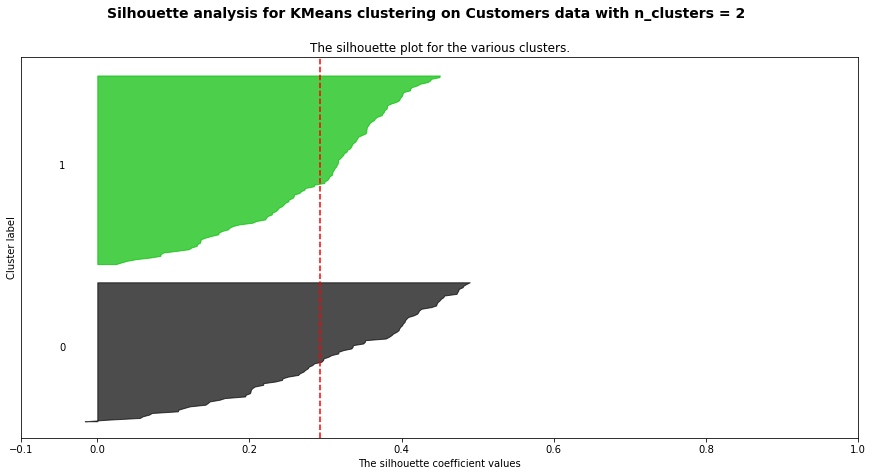

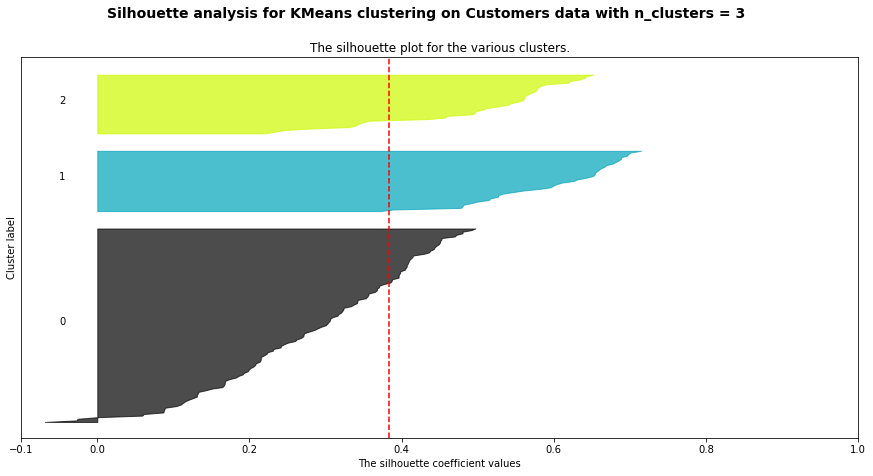

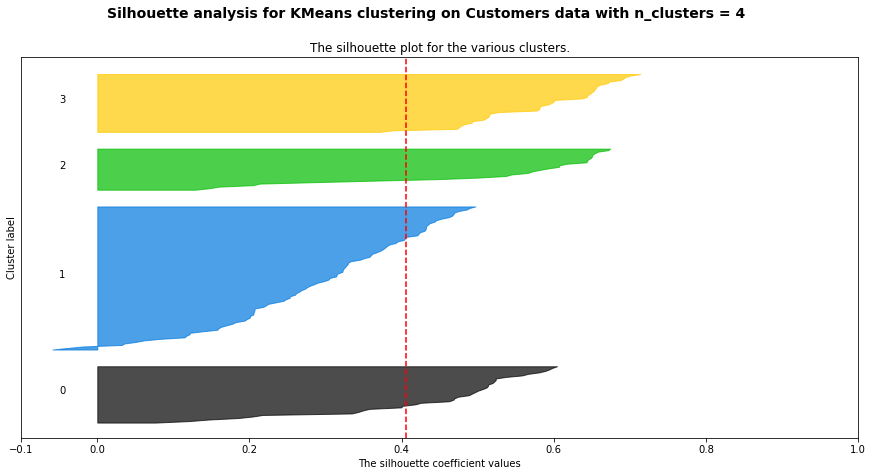

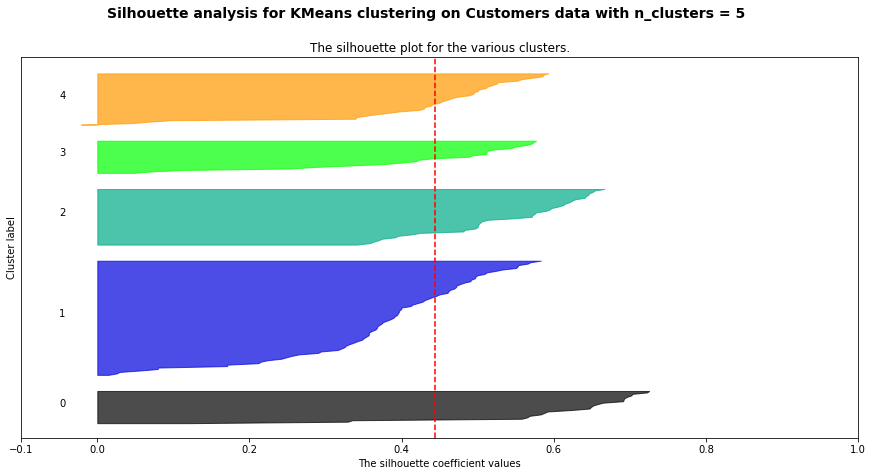

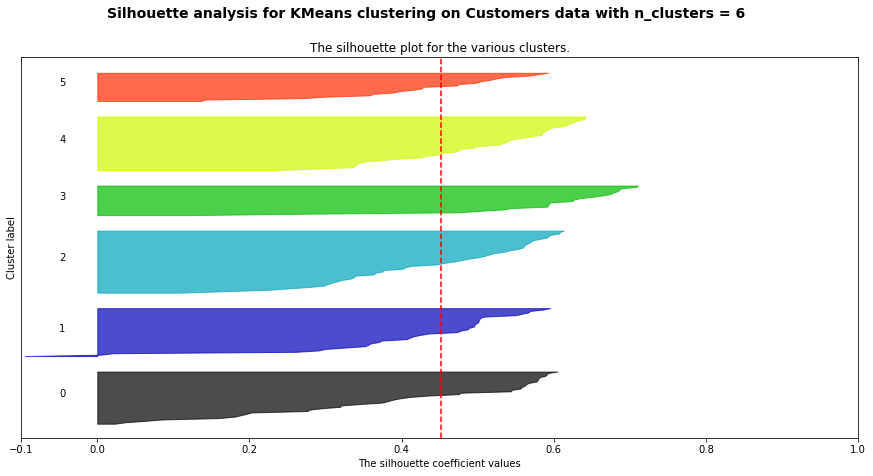

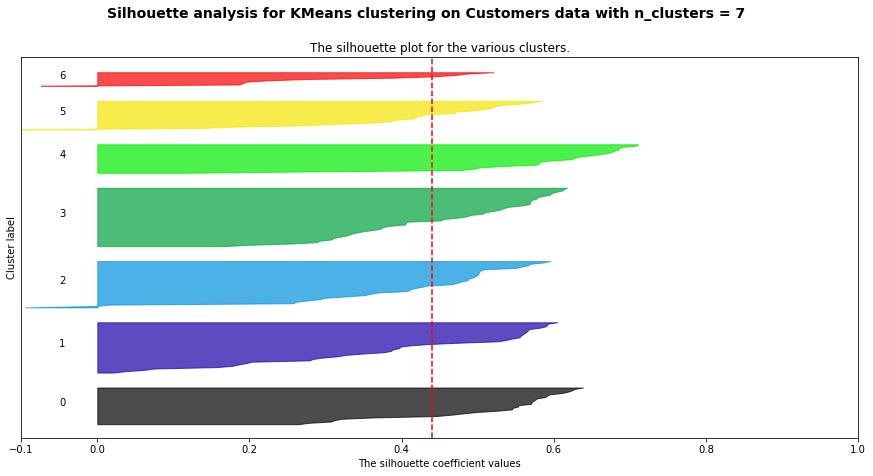

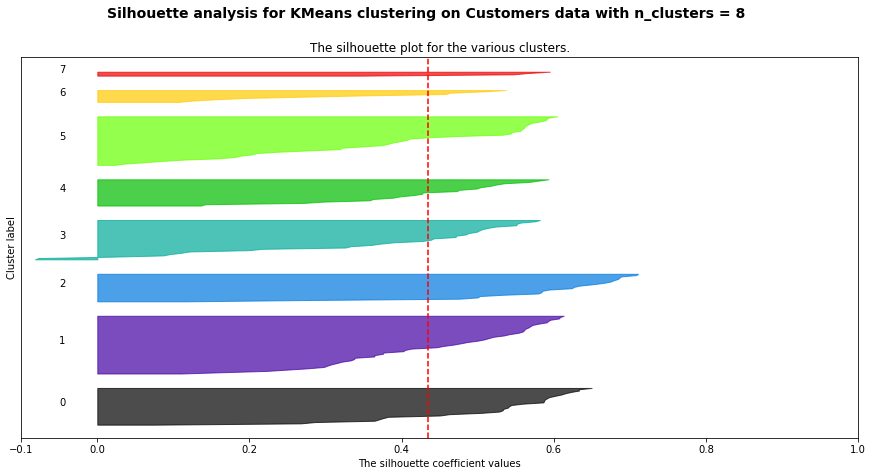

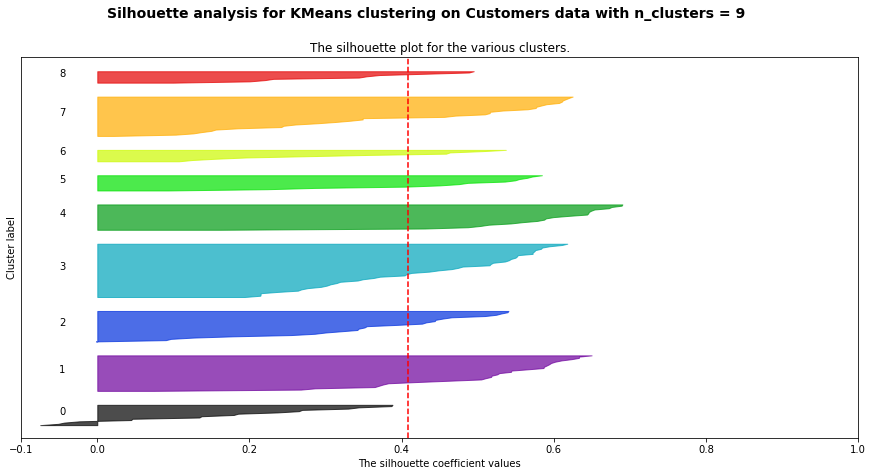

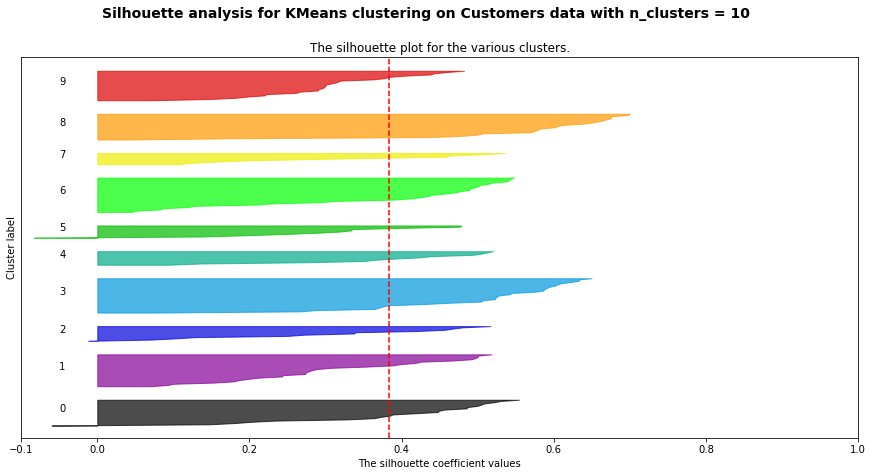

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

l=[]
X = customers_df.iloc[:,1:]
for n_clusters in range(2,11):
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(15, 7)


    ax1.set_xlim([-.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    l.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    

    plt.suptitle(("Silhouette analysis for KMeans clustering on Customers data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    

<ipython-input-23-32605c9179c0>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = plt.axes()


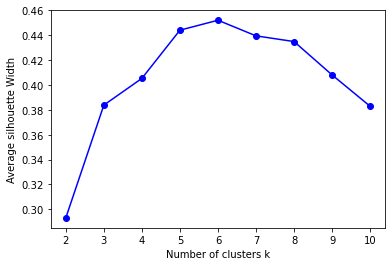

In [23]:
clusters = list(range(2,11))
plt.plot(clusters,l,'-bo')
axes = plt.axes()
axes.set_xlabel("Number of clusters k")
axes.set_ylabel("Average silhouette Width")
plt.show()

# VISUALIZATION

In [24]:
from sklearn.decomposition import PCA
reduced = PCA(n_components=2).fit_transform(X)

kmeans = KMeans(init='k-means++', n_clusters=6, random_state=10)
kmeans.fit(reduced)

KMeans(n_clusters=6, random_state=10)

In [25]:
pca_df = pd.DataFrame(reduced,columns=['Component1','Component2'])
pca_df['Segment'] = kmeans.labels_
pca_df.head(10)

,Component1,Component2,Segment
0,-31.869945,-33.001252,1
1,0.764494,-56.842901,3
2,-57.408276,-13.124961,1
3,-2.168543,-53.478590,3
4,-32.174085,-30.388412,1
5,-2.176952,-52.227269,3
6,-59.065690,-9.543763,1
7,12.370862,-61.618021,3
8,-66.315769,-3.214232,1
9,-5.655562,-47.267222,3


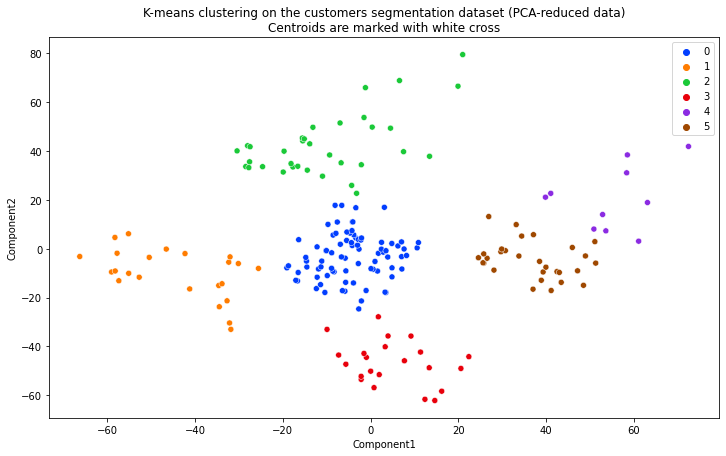

In [26]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Component1',y='Component2',data=pca_df,hue='Segment',palette='bright')
plt.title('K-means clustering on the customers segmentation dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.legend()
plt.show()


  \- **Cluster 0 and 5** – The two cluster consists of  customers with medium PCA2 and a high PCA1.

  \- **Cluster 1** – This cluster represents customers having a high PCA2 and a low PCA1.

  \- **Cluster 2** - This cluster consists of customers with medium PCA1 and medium PCA2 score.

  \- **Cluster 3** – This comprises of customers with a high PCA2 and a medium annual spend of income.

  \- **Cluster 4** – In this cluster, there are customers with a medium PCA1 and a low PCA2 score.

  








\- With the help of clustering, we can understand the variables much better, prompting us to take careful decisions. With the identification of customers, companies can release products and services that target customers based on several parameters like income, age, spending patterns, etc. Furthermore, more complex patterns like product reviews are taken into consideration for better segmentation.